#1 Thư viện

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import folium
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from geopy.geocoders import ArcGIS

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#2 Bộ dữ liệu

In [ ]:
DRIVE_PATH = '../gdrive/MyDrive/[IE224]_Final_Project/'
DATA_PATH = 'Data/preprocess_data.csv'

In [ ]:
cd '/content/drive/MyDrive/[IE224]_Final_Project'

In [ ]:
df = pd.read_csv(DATA_PATH)

**Tổng quan chung về bộ dữ liệu**

In [ ]:
df.head()

,building_type,squares,nums_bedroom,nums_wc,nums_floor,furniture,price,project_names,streets,wards,districts
0,Căn hộ chung cư,88.0,3,2,1,Cơ bản,9.5,Dự án The Western Capital,Đường Lý Chiêu Hoàng,Phường 10,6
1,Căn hộ chung cư,88.0,3,2,1,Đầy đủ,9.0,Dự án The Western Capital,Đường Lý Chiêu Hoàng,Phường 10,6
2,Căn hộ chung cư,70.0,2,2,1,Đầy đủ,7.0,Dự án The Western Capital,Đường Lý Chiêu Hoàng,Phường 10,6
3,Căn hộ chung cư,92.0,2,2,1,Đầy đủ,18.0,Dự án Vinhomes Central Park,Đường Điện Biên Phủ,Phường 22,Bình Thạnh
4,Căn hộ chung cư,56.0,3,2,1,Cao cấp,15.0,Dự án Vinhomes Central Park,Đường Điện Biên Phủ,Phường 22,Bình Thạnh


In [ ]:
df.shape

(1499, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   building_type  1499 non-null   object 
 1   squares        1499 non-null   float64
 2   nums_bedroom   1499 non-null   int64  
 3   nums_wc        1499 non-null   int64  
 4   nums_floor     1499 non-null   int64  
 5   furniture      1499 non-null   object 
 6   price          1499 non-null   float64
 7   project_names  1499 non-null   object 
 8   streets        1499 non-null   object 
 9   wards          1499 non-null   object 
 10  districts      1499 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 128.9+ KB


**Thống kê từng loại hình**

In [ ]:
df['building_type'].value_counts()

Nhà trọ phòng trọ    547
Căn hộ chung cư      489
Nhà riêng            463
Name: building_type, dtype: int64

In [ ]:
df['nums_bedroom'].value_counts()

1    687
2    371
4    149
3    145
5    113
6     24
7      7
8      3
Name: nums_bedroom, dtype: int64

In [ ]:
df['nums_wc'].value_counts()

1    740
2    406
4    158
3     98
5     79
6     15
8      2
7      1
Name: nums_wc, dtype: int64

In [ ]:
df.groupby(['nums_bedroom'])['nums_wc'].value_counts()

nums_bedroom  nums_wc
1             1          680
              2            7
2             2          304
              1           54
              3            9
              4            3
              5            1
3             2           89
              3           37
              4           12
              1            6
              5            1
4             4           68
              3           41
              5           35
              2            5
5             4           65
              5           34
              3            9
              6            4
              2            1
6             6            9
              4            8
              5            4
              3            2
              7            1
7             5            3
              4            2
              6            2
8             8            2
              5            1
Name: nums_wc, dtype: int64

# 3 Trực quan hóa dữ liệu

## 3.1 Hàm phụ trợ

In [ ]:
# Hàm xác định và loại bỏ các giá trị ngoại lệ
def exception_values (column, min_value, max_value):
  Q1 = np.quantile(column,min_value)
  Q3 = np.quantile(column,max_value)
  med = np.median(column)
  IQR = Q3 - Q1
  upper_bound = Q3+(1.5*IQR)
  lower_bound = Q1-(1.5*IQR)
  outliers1 = column[(column <= lower_bound) | (column >= upper_bound)]
  print
  return outliers1.index

In [ ]:
# Mặc định cách xuất biểu đồ
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

## 3.2 Xác định và loại bỏ các giá trị ngoại lệ

**Biểu diễn dữ liệu**

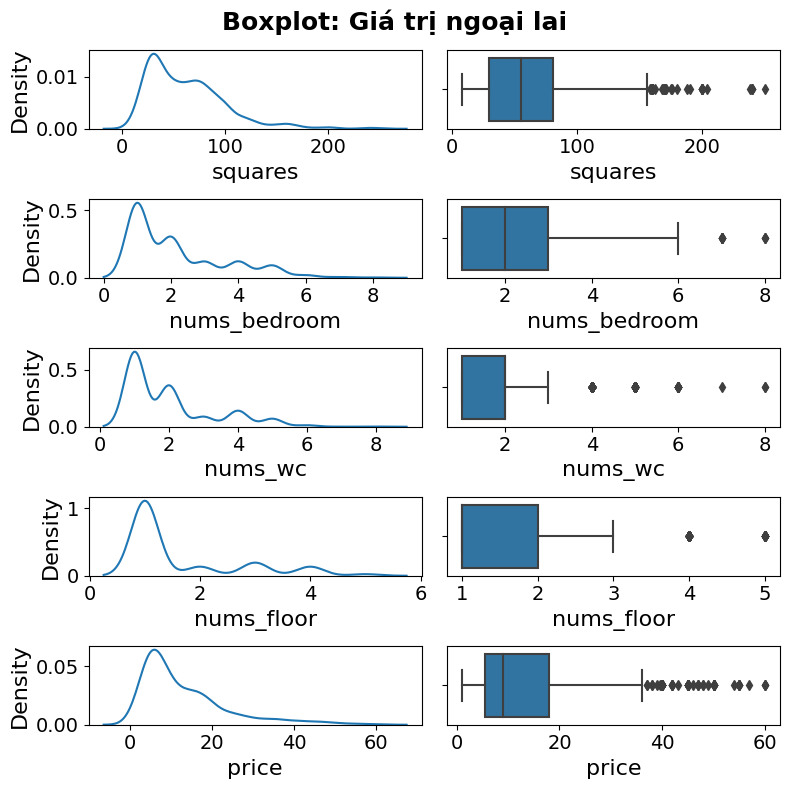

In [ ]:
fig, ax = plt.subplots(5,2, figsize = (8,8))

fig.suptitle('Boxplot: Giá trị ngoại lai', size = 18, fontweight="bold")
sns.kdeplot(ax= ax[0,0], data = df, x = 'squares')
sns.boxplot(ax= ax[0,1], data = df, x = 'squares')
sns.kdeplot(ax= ax[1,0], data = df, x = 'nums_bedroom')
sns.boxplot(ax= ax[1,1], data = df, x = 'nums_bedroom')
sns.kdeplot(ax= ax[2,0], data = df, x = 'nums_wc')
sns.boxplot(ax= ax[2,1], data = df, x = 'nums_wc')
sns.kdeplot(ax= ax[3,0], data = df, x = 'nums_floor')
sns.boxplot(ax= ax[3,1], data = df, x = 'nums_floor')
sns.kdeplot(ax= ax[4,0], data = df, x = 'price')
sns.boxplot(ax= ax[4,1], data = df, x = 'price')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

**Thống kê các giá trị của từng biến số trong bộ dữ liệu**

In [ ]:
df.describe().round(2)

,squares,nums_bedroom,nums_wc,nums_floor,price
count,1499.00,1499.00,1499.00,1499.00,1499.00
mean,61.98,2.16,1.99,1.64,13.12
std,37.04,1.43,1.30,1.07,10.69
min,8.00,1.00,1.00,1.00,1.00
25%,30.00,1.00,1.00,1.00,5.50
50%,55.00,2.00,2.00,1.00,9.00
75%,80.50,3.00,2.00,2.00,18.00
max,250.00,8.00,8.00,5.00,60.00


Sau khi thống kê các giá trị của từng biến số, chúng tôi nhận thấy:

1.   **squares**:

*   Phạm vi giá trị khá lớn, dao động từ 8 - 800.
*   Do đó, dữ liệu sẽ có biến động lớn, điều này thể hiện qua (trung bình) mean:71,67 và (độ lệch chuẩn) std:69,12.

2.   **nums_bedroom**:

*   Phần lớn các nhà có từ 1 đến 3 phòng ngủ.
*   Tuy nhiên, số lượng phòng ngủ max là 20 phòng, do đó, cần phải xem xét thêm tỷ lệ phần trăm của từng giá trị trong cột nums_bedroom.

2.   **nums_wc**:

*   Tương tự như nums_bedroom, số lượng nhà vệ sinh đa phần nằm trong khoảng từ 1 đến 3.
*   Nhìn nhận với nums_bedrooms, có thể thấy độ tương quan lớn giữa nums_bedroom và nums_floor khi mà số lượng phòng ngủ sẽ bằng hoặc chênh lệch không đánh kể với số lượng nhà vệ sinh.

3.   **nums_floor**:

*   Đa phần các căn hộ sẽ có 1 tầng, không quá khó hiểu khi mà loại hình chung cư và phòng trọ đã chiếm tới 1/2 tổng số dữ liệu.

4.   **price**:

*   Giá trị trung bình của nhà là 16.03, nhưng có sự biến động lớn với độ lệch chuẩn là 19.87.
*   Phần lớn các nhà có giá từ 5.7 đến 18.0 (25% đến 75%).





**Loại bỏ các giá trị ngoại lai**

In [ ]:
df = df.drop(exception_values(df.squares, 0, 0.9)).reset_index(drop=True)
df = df.drop(exception_values(df.nums_bedroom, 0, 0.90)).reset_index(drop=True)
df = df.drop(exception_values(df.nums_wc,0, 0.90)).reset_index(drop=True)
# df = df.drop(exception_values(df.nums_floor, 0, 0.98)).reset_index(drop=True)
df = df.drop(exception_values(df.price, 0.2, 0.9)).reset_index(drop=True)

In [ ]:
df.describe().round(2)

,squares,nums_bedroom,nums_wc,nums_floor,price
count,1499.00,1499.00,1499.00,1499.00,1499.00
mean,61.98,2.16,1.99,1.64,13.12
std,37.04,1.43,1.30,1.07,10.69
min,8.00,1.00,1.00,1.00,1.00
25%,30.00,1.00,1.00,1.00,5.50
50%,55.00,2.00,2.00,1.00,9.00
75%,80.50,3.00,2.00,2.00,18.00
max,250.00,8.00,8.00,5.00,60.00


In [ ]:
df.shape

(1499, 11)

In [ ]:
def plot_percentage_bar(df, column_name):
    percentage_df = df[column_name].value_counts(normalize=True) * 100

    plt.figure(figsize=(10, 6))
    sns.barplot(x=percentage_df.index, y=percentage_df.values)
    plt.xlabel(column_name)
    plt.ylabel('Percentage')
    plt.title(f'Percentage of Each {column_name}')
    plt.show()

## 2.4 Loại bỏ giá trị trùng lặp

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates(ignore_index=True)

In [ ]:
df.shape

(1499, 11)

## Kết quả
Nhìn vào các biểu đồ này, ta có thể thấy mức độ tập trung của dữ liệu trong từng thuộc tính, từ đó xác định được giá trị ngoại lai của từng thuộc tính.


*   Đối với squares, các giá trị ngoại lai khá nhiều tuy nhiên  




# 4 Heatmap

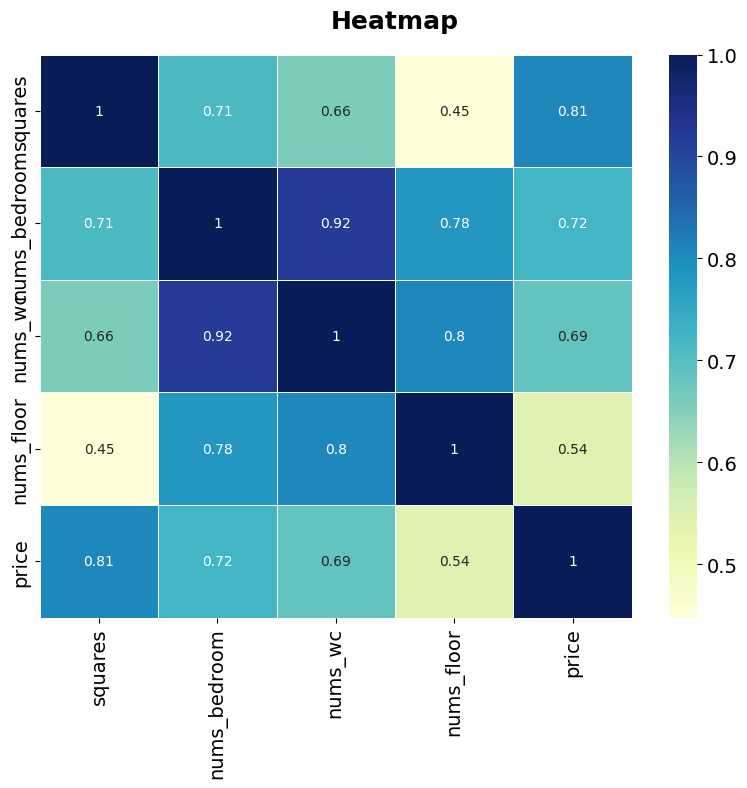

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-721-6f35a752a896>", line 9, in <cell line: 9>
    fig.savefig('Heatmap', dpi = 250)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/figure.py", line 3343, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/backend_bases.py", line 2366, in print_figure
    result = print_method(
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/backend_bases.py", line 2232, in <lambda>
    print_method = functools.wraps(meth)(lambda *args, **kwargs: meth(
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/backends/backend_agg.py", line 509, in print_png
    self._print_pil(filename_or_obj, "png", pil_kwargs, metadata)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/backends/backend_agg.p

In [ ]:
fig = plt.figure(figsize=(8,8))

sns.heatmap(df.corr(), annot = True, cmap='YlGnBu', linewidth=.5)
fig.suptitle('Heatmap',fontsize=18, fontweight="bold")
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

fig.savefig('Heatmap', dpi = 250)

**Nhận xét:**
Dựa vào biểu đồ này, có thể thấy post_verified không quá ảnh hưởng đến giá, chúng tôi sẽ loại bỏ thuộc tính này ra khỏi bộ dữ liệu cuối cùng

#5 Phân tích dữ liệu thăm dò (EDA)



In [ ]:
# Tách cột biến số và biến phân loại
num_columns = df.describe().columns
categorical_cols = df.describe(include= 'object').columns

## 5.1 Độ tương quan giữa các biến số lên giá
Các biến số bao gồm:
*   post_verified
*   squares
*   nums_bedroom
*   nums_wc
*   nums_floor



In [ ]:
for col in num_columns:
  print(col)
print('Số lượng biến số:', len(num_columns))

squares
nums_bedroom
nums_wc
nums_floor
price
Số lượng biến số: 5


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-723-3ae35b0f03d2>", line 4, in <cell line: 4>
    sns.barplot(ax= ax[0,0], data = df, x = df.groupby('post_verified').mean().index, y = df.groupby('post_verified').mean().price)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 8402, in groupby
    return DataFrameGroupBy(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/groupby.py", line 965, in __init__
    grouper, exclusions, obj = get_grouper(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/grouper.py", line 888, in get_grouper
    raise KeyError(gpr)
KeyError: 'post_verified'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactivesh

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-723-3ae35b0f03d2>", line 4, in <cell line: 4>
    sns.barplot(ax= ax[0,0], data = df, x = df.groupby('post_verified').mean().index, y = df.groupby('post_verified').mean().price)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 8402, in groupby
    return DataFrameGroupBy(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/groupby.py", line 965, in __init__
    grouper, exclusions, obj = get_grouper(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/grouper.py", line 888, in get_grouper
    raise KeyError(gpr)
KeyError: 'post_verified'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactivesh

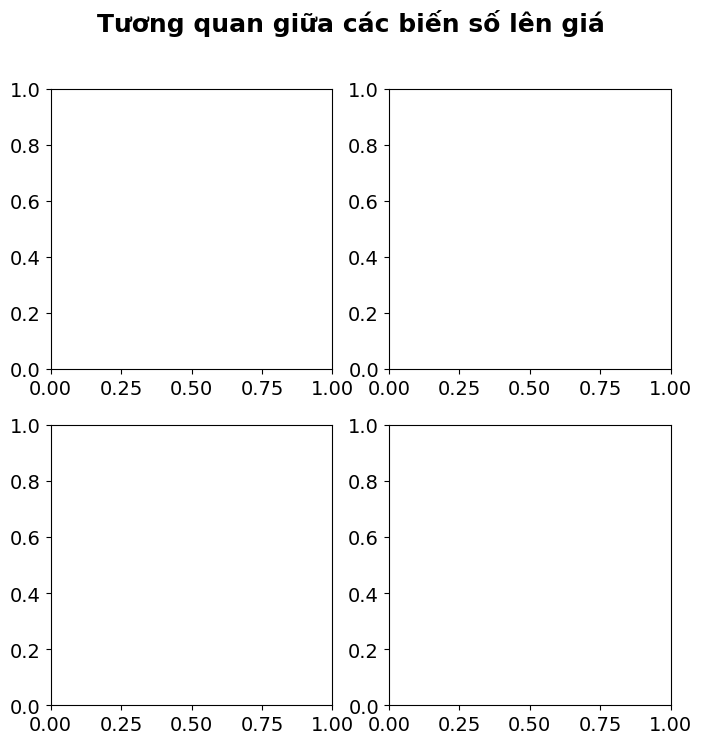

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (8,8))

fig.suptitle('Tương quan giữa các biến số lên giá', size = 18, fontweight="bold")
sns.barplot(ax= ax[0,0], data = df, x = df.groupby('post_verified').mean().index, y = df.groupby('post_verified').mean().price)
sns.barplot(ax= ax[0,1], data = df, x = df.groupby('nums_bedroom').mean().index, y = df.groupby('nums_bedroom').mean().price)
sns.barplot(ax= ax[1,0], data = df, x = df.groupby('nums_wc').mean().index, y = df.groupby('nums_wc').mean().price)
sns.barplot(ax= ax[1,1], data = df,  x= df.groupby('nums_floor').mean().index, y= df.groupby('nums_floor').mean().price, palette= 'muted')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

# fig.savefig('Outliers', dpi = 500)

**Nhận xét:** Nhìn chung có thể thấy, giá nhà trung bình phụ thuộc khá nhiều vào số lượng phòng ngủ, nhà vệ sinh cũng như là số tầng. Khi các giá trị này tăng thì giá thuê cũng sẽ tăng theo.

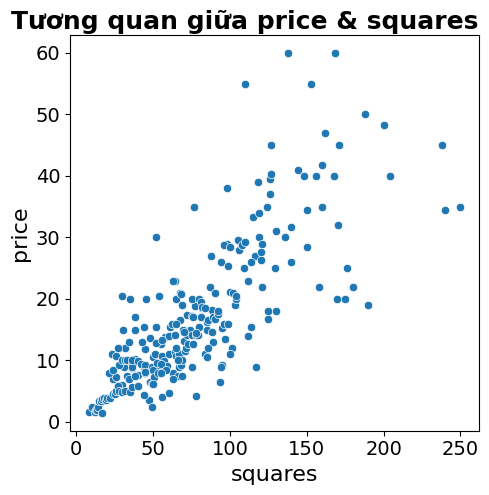

In [ ]:
fig = plt.figure(figsize=(5,5))

group_full = df.groupby(['building_type', 'squares'])['price'].mean()
group = group_full.reset_index()

x = group['squares']
y = group['price']
fig.suptitle('Tương quan giữa price & squares', fontsize= 18 , fontweight='bold')
fig.text(0.9, 0.15, '', fontsize = 13, color ='black')
sns.scatterplot(x=x, y=y)

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('SqFt_Area_Price_Scatter', dpi = 500)

**Nhận xét:** khác với sự tuyến tính của các biến số khác, so với squares, có thể nhận ra được tuyến tính giữa price và square nhưng sự tuyến tình chưa được rõ nét.

## 5.2 Độ tương quan giữa biến phân loại lên giá

In [ ]:
for col in categorical_cols:
  print(col)
print('Số lượng biến số:', len(categorical_cols))

building_type
furniture
project_names
streets
wards
districts
Số lượng biến số: 6


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-725-101fadc48af5>", line 4, in <cell line: 4>
    sns.barplot(ax= ax[0], data = df, x = df.groupby('post_type').mean().price, y = df.groupby('post_type').mean().index)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 8402, in groupby
    return DataFrameGroupBy(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/groupby.py", line 965, in __init__
    grouper, exclusions, obj = get_grouper(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/grouper.py", line 888, in get_grouper
    raise KeyError(gpr)
KeyError: 'post_type'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-725-101fadc48af5>", line 4, in <cell line: 4>
    sns.barplot(ax= ax[0], data = df, x = df.groupby('post_type').mean().price, y = df.groupby('post_type').mean().index)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 8402, in groupby
    return DataFrameGroupBy(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/groupby.py", line 965, in __init__
    grouper, exclusions, obj = get_grouper(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/grouper.py", line 888, in get_grouper
    raise KeyError(gpr)
KeyError: 'post_type'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 

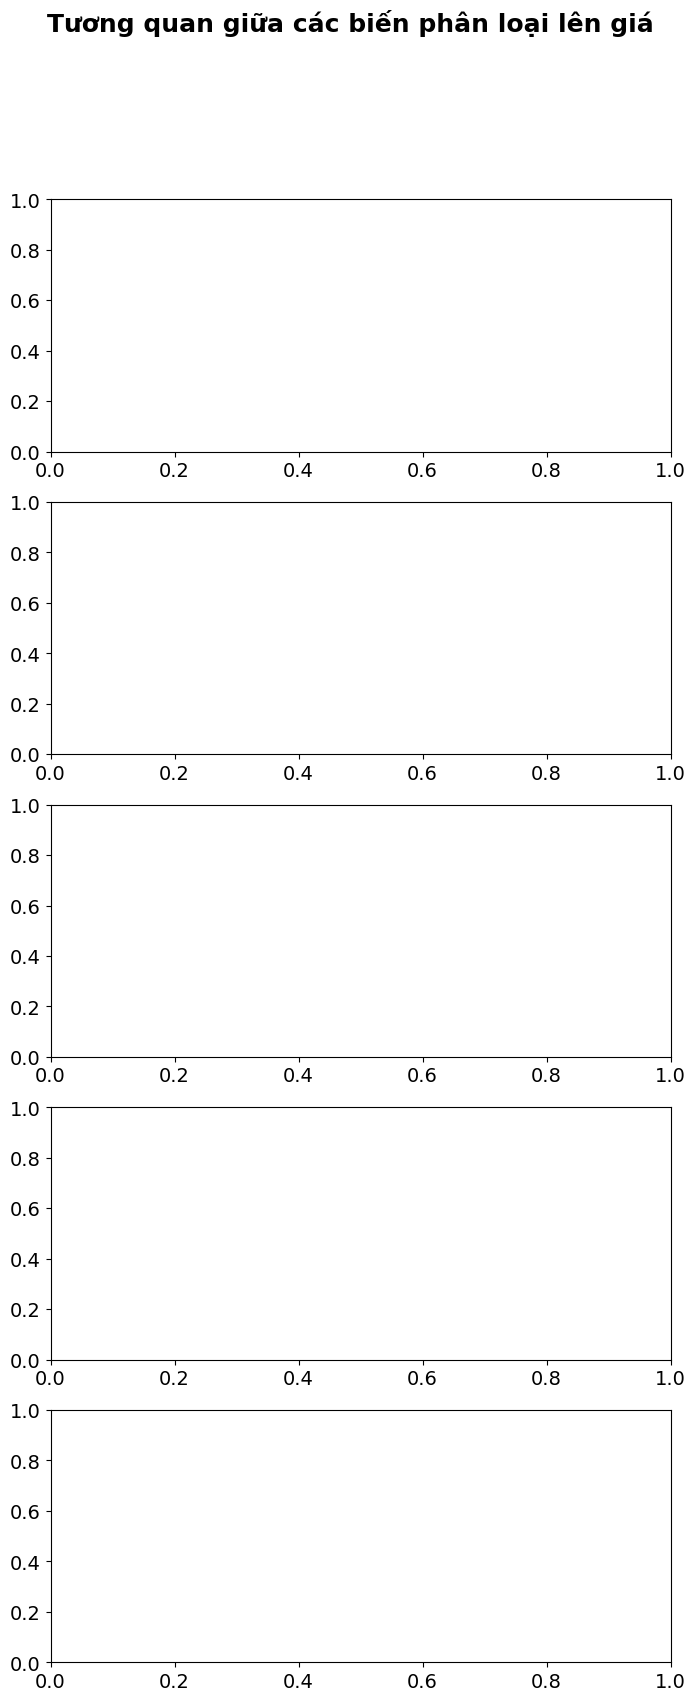

In [ ]:
fig, ax = plt.subplots(5,1, figsize = (8,19))

fig.suptitle('Tương quan giữa các biến phân loại lên giá', size = 18, fontweight="bold")
sns.barplot(ax= ax[0], data = df, x = df.groupby('post_type').mean().price, y = df.groupby('post_type').mean().index)
sns.barplot(ax= ax[1], data = df, x = df.groupby('building_type').mean().price, y = df.groupby('building_type').mean().index)
sns.barplot(ax= ax[2], data = df, x = df.groupby('furniture').mean().price, y = df.groupby('furniture').mean().index)
sns.barplot(ax= ax[3], data = df, x= df.groupby('type_squares').mean().price, y= df.groupby('type_squares').mean().index)
sns.barplot(ax= ax[4], data = df, x= df.groupby('districts').mean().price, y= df.groupby('districts').mean().index)

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

# fig.savefig('Outliers', dpi = 500)

**Nhận xét:**
*   Đối với districts, chúng tôi nhận thấy sự phân bố giá thuê rõ ràng giữa các quận. Chúng tôi sẽ khai thác thêm thông tin này và kết hợp với các thuộc tính khác để làm rõ bộ dữ liệu

## 5.2.3 Đánh giá độ ảnh hưởng của các biến lên price

In [ ]:
def anova_cat(df, col):
  values = df[col].unique()
  data = [df['price'][df[col] == value] for value in values]

  anova = f_oneway(*data)
  print(f'Ảnh hưởng của {col} lên price:\n{anova}\n')

In [ ]:
# Kiểm tra ảnh hưởng của dự án lên giá thuê
anova_cat(df,'post_type')

# Kiểm tra ảnh hưởng của dự án lên giá thuê
anova_cat(df,'project_names')

# Kiểm tra ảnh hưởng của quận lên giá thuê
anova_cat(df,'districts')

# Kiểm tra ảnh hưởng của quận lên giá thuê
anova_cat(df,'streets')

# Kiểm tra ảnh hưởng của quận lên giá thuê
anova_cat(df,'wards')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 165, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5745, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5753, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'post_type'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-726-026873dfb806>", line 2, in <cell line: 2>
    anova_cat(df,'post_type')
  File "<ipython-input-725-5488f43c9

**Nhận xét**
*   Có thể nhận thấy, post_type sẽ không ảnh hưởng quá nhiều đến giá. Dù tin có được xác thực hay không xác thực thì giá nhà vẫn sẽ không thay đổi quá nhiều theo tin.
*   Có sự khác biệt ý nghĩa giữa các nhóm project_names, streets, wards và districts đối với giá thuê.

# 6 Xử lý và lưu trữ dữ liệu

**Loại bỏ các cột không cần thiết**

In [ ]:
df = df.drop(['post_verified', 'post_type', 'type_squares'], axis=1).reset_index(drop=True)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-726-85273411784e>", line 1, in <cell line: 1>
    df = df.drop(['post_verified', 'post_type', 'type_squares'], axis=1).reset_index(drop=True)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 5399, in drop
    return super().drop(
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 4505, in drop
    obj = obj._drop_axis(labels, axis, level=level, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 4546, in _drop_axis
    ne

In [ ]:
df.to_csv('final_data.csv', index = False)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-726-e109ba35c9e1>", line 1, in <cell line: 1>
    df.to_csv('final_data.csv', index = False)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 3720, in to_csv
    return DataFrameRenderer(formatter).to_csv(
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py", line 1189, in to_csv
    csv_formatter.save()
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/formats/csvs.py", line 241, in save
    with get_handle(
  File "/usr/local/lib/python3.10/dist-package